In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pygam import LinearGAM, s, f

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

In [9]:
df = pd.read_csv("/Users/tianyiluo/Desktop/draft_2_Tianyi/bike+sharing+dataset/day.csv") 

In [10]:
X = df[['temp','hum','windspeed','weekday']]
y = df['cnt']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [13]:
#GAM model (suppress gridsearch progress bar with progress=False)
gam = LinearGAM(s(0) + s(1) + s(2) + f(3)).gridsearch(X_train.values, y_train.values, progress=False)
y_pred_gam = gam.predict(X_test)

In [14]:
print("LR RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("GAM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gam)))
print("LR R2:", r2_score(y_test, y_pred_lr))
print("GAM R2:", r2_score(y_test, y_pred_gam))

LR RMSE: 1611.4884335608572
GAM RMSE: 1378.0083784815465
LR R2: 0.3894174077327973
GAM R2: 0.5535284919403534


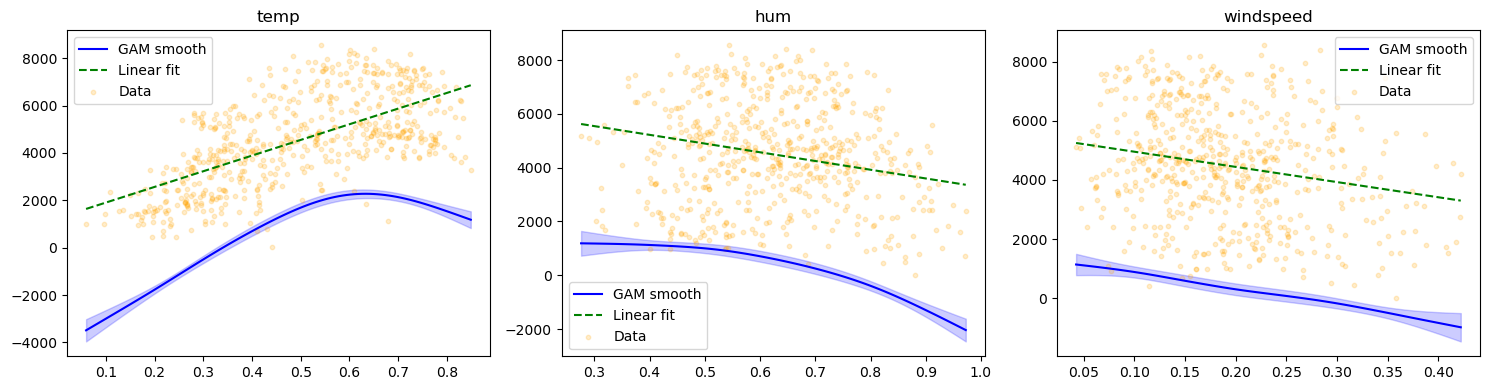

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
for i, var in enumerate(['temp','hum','windspeed']):
    XX = gam.generate_X_grid(term=i, n=100)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    lower, upper = confi.T
    
    # GAM smooth
    axs[i].plot(XX[:, i], pdep, color="blue", label="GAM smooth")
    axs[i].fill_between(XX[:, i], lower, upper, color="blue", alpha=0.2)
    
    # Linear Regression
    beta_i = lr.coef_[i]
    intercept = lr.intercept_
    other_effect = sum(
        lr.coef_[j] * X_train.iloc[:, j].mean()
        for j in range(len(X.columns)) if j != i
    )
    lr_line = intercept + beta_i * XX[:, i] + other_effect
    axs[i].plot(XX[:, i], lr_line, "g--", label="Linear fit")
    
    # Raw data for context
    axs[i].scatter(X_train[var], y_train, alpha=0.2, s=10, color="orange", label="Data")
    
    axs[i].set_title(var)
    axs[i].legend()

plt.tight_layout()
plt.show()

 
 - visuals, how to better visualize it. 
 - other more general suggestions. 

In [16]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     12.1576
Link Function:                     IdentityLink Log Likelihood:                                 -8814.9876
Number of Samples:                          584 AIC:                                            17656.2903
                                                AICc:                                           17656.9441
                                                GCV:                                          1488584.8146
                                                Scale:                                        1432910.0417
                                                Pseudo R-Squared:                                   0.6124
Feature Function                  Lam

/var/folders/5f/vq31x3ws3756twnm7dl48s3m0000gn/T/ipykernel_82923/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
